In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [41]:
maindatapath = "../OSC-measuresments/"

oscpaths = [maindatapath + osc +"/" for osc in  os.listdir(maindatapath) if osc[-4:]!=".jpg"] # the paths to the folders of the samples

cellpaths = lambda osc : [ oscpaths[osc] + cell + "/" for cell in os.listdir(oscpaths[osc]) ]

measurementpaths = lambda osc, cell : [cellpaths(osc)[cell] + measurement for measurement in os.listdir(cellpaths(osc)[cell])]

measurement = lambda osc,cell,mm : np.loadtxt(measurementpaths(osc,cell)[mm], skiprows=1).T

print(measurement(0,0,0).shape)

(2, 201)


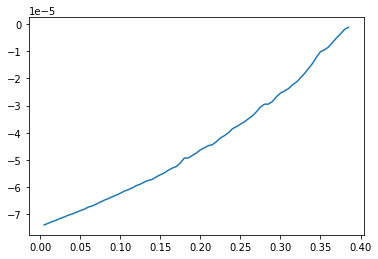

In [62]:
#measurementrelevant = lambda osc, cell, mm : np.where(measurement(osc,cell,mm)*np.array([[1],[-1]])>0,measurement(osc,cell,mm),0)
measurementrelevant = lambda osc, cell, mm : measurement(osc,cell,mm)[ : ,  np.where( np.all ( measurement(osc,cell,mm)*np.array([[1],[-1]])>0 , axis =(0)))[0] ] 
    # ^ slices the array down to all the pairs where the voltage is positive and the current is negative
mmr1 = measurementrelevant(0,0,2)
plt.plot(mmr1[0],mmr1[1])

In [55]:
def interpolate(mat, witherrors=False):
    x1,x2 = mat[0]
    y1,y2 = mat[1]
    x0 = (y1*x2-y2*x1)/(y1-y2)
    return x0


def find_zeros(mm):
    V = mm[0]
    I = mm[1]
    iscindeces = [np.where(V<0)[0][-1],np.where(V>0)[0][0]]
    vocindeces = [np.where(I<0)[0][-1],np.where(I>0)[0][0]]
    isc = interpolate(np.array([[0,1],[1,0]])@mm[:,iscindeces]) # the matrix mult is to swap the voltage and current
    voc = interpolate(mm[:,vocindeces])
    return isc, voc, iscindeces, vocindeces

def power_curve(mmr):
    V,I = mmr
    P = V*np.abs(I)
    return P

measurement1 = measurement(0,0,1)

print(measurement1[:,np.where(np.all(measurement1*np.array([[1],[-1]])>0,axis=(0)))[0]])

#measurement1[:,find_zeros(measurement1)[1]]

find_zeros(measurement1)

[[ 4.999995e-03  9.999990e-03  1.499999e-02  2.000000e-02  2.499999e-02
   2.999999e-02  3.500000e-02  3.999999e-02  4.499999e-02  5.000000e-02
   5.499999e-02  5.999999e-02  6.499998e-02  6.999998e-02  7.500000e-02
   8.000000e-02  8.499999e-02  8.999999e-02  9.499998e-02  9.999998e-02
   1.050000e-01  1.100000e-01  1.150000e-01  1.200000e-01  1.250000e-01
   1.300000e-01  1.350000e-01  1.400000e-01  1.450000e-01  1.500000e-01
   1.550000e-01  1.600000e-01  1.650000e-01  1.700000e-01  1.750000e-01
   1.800000e-01  1.850000e-01  1.900000e-01  1.950000e-01  2.000000e-01
   2.050000e-01  2.100000e-01  2.150000e-01  2.200000e-01  2.250000e-01
   2.300000e-01  2.350000e-01  2.400000e-01  2.450000e-01  2.500000e-01
   2.550000e-01  2.600000e-01  2.650000e-01  2.700000e-01  2.750000e-01
   2.800000e-01  2.850000e-01  2.900000e-01  2.950000e-01  3.000000e-01
   3.050000e-01  3.100000e-01  3.150000e-01  3.200000e-01  3.250000e-01
   3.300000e-01  3.350000e-01  3.400000e-01  3.450000e-01  3.500

(-8.931019768108607e-05, 0.42458230262617314, [40, 41], [124, 125])

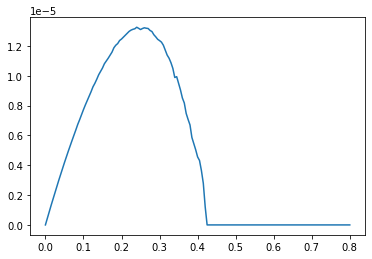

In [37]:
mr1 = measurementrelevant(0,0,1)
power1 = power_curve(mr1)
plt.plot(mr1[0],power1)

In [52]:
a = np.array([[1,2,3,4],[5,6,7,8]])
a[:,[2,3]]

array([[3, 4],
       [7, 8]])